<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/Adam_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error


In [101]:
data=pd.read_csv(r'/MultipleLR.csv - MultipleLR.csv.csv',header=None)
data=np.asarray(data)
x=data[:,:3].reshape(-1,3)
x=np.c_[np.ones((len(x),1)),x]
xx=np.c_[np.ones((len(x),1)),x]
y=data[:,3].reshape(-1,1)
y.shape


(25, 1)

### **NOTE: I used a higher number of epochs(15000) to test the stopping conditions while the needed epochs are less**

In [102]:
m=np.zeros((1,x.shape[1]))
v=np.zeros((1,x.shape[1]))
Theta=np.zeros((1,x.shape[1])).reshape(1,x.shape[1])
epochs= 15000
B1=0.9
B2=0.999
eps=10**-8
alpha= 0.009


def Adam_Batch (x,y,m,v,eps,alpha,epochs,Theta,B1,B2):
  losses=[]
  iters=[]
  iter=0
  Theta0=[]
  Theta1=[]
  Theta2=[]
  Theta3=[]
  for e in range (epochs):


              h=np.dot(x,np.transpose(Theta))
              # print('h',h.shape)
              # print('y',Y.shape)

              err= h-y
              # print('err',err.shape)
              loss= (1/(2*x.shape[0]))* np.dot(np.transpose(err),err)
              
              # print('loss',loss.shape)
              grad= 1/x.shape[0] * np.dot(np.transpose(err),x)
              losses.append(loss)

              if losses[e]-losses[e-1] > 0 :
                # or np.linalg.norm(grad) < 0.001
                losses.pop()
                break
              else:  
                m=(B1*m)+((1-B1)*(grad))
                # print('m',m.shape)
                m_cor=(m)/(1-(B1**(e+1)))
                
                v=(B2*v)+((1-B2)*(grad)**2)

                # print('v',v.shape)
                v_cor=(v)/(1-(B2**(e+1)))
                
                Theta= Theta - alpha*(m_cor/(np.sqrt(v_cor)+eps))
                Theta= Theta.reshape(1,x.shape[1])
                # print('Theta', Theta)
                Theta0.append(Theta[:,0])
                Theta1.append(Theta[:,1])
                Theta2.append(Theta[:,2])
                Theta3.append(Theta[:,3])

                iters.append(iter)
                iter+=1
  print('iters', len(iters))
  return Theta, losses ,iters,Theta0,Theta1,Theta2,Theta3


In [103]:
Theta, losses,iters,Theta0,Theta1,Theta2,Theta3 =  Adam_Batch (x,y,m,v,eps,alpha,epochs,Theta,B1,B2)
y_pred= np.dot(x,np.transpose(Theta))
score=r2_score(y,y_pred)
score


iters 12443


0.9896615752603424

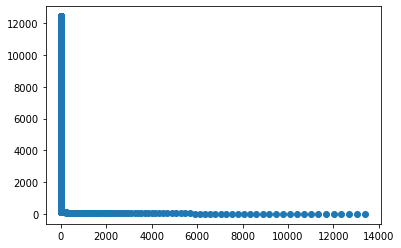

In [104]:
plt.scatter(losses,iters)

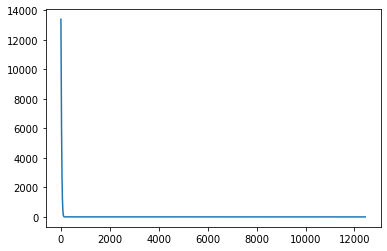

In [105]:
losses=np.asarray(losses).reshape(-1,1)
plt.plot(losses)

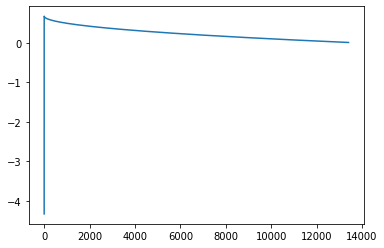

In [106]:
plt.plot(losses,Theta0)

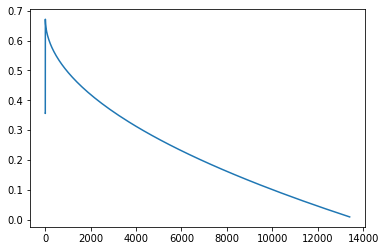

In [107]:
plt.plot(losses,Theta1)

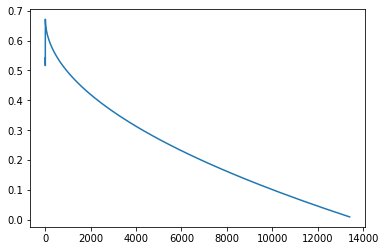

In [108]:
plt.plot(losses,Theta2)

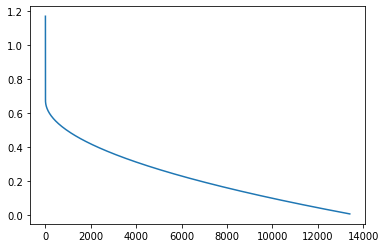

In [109]:
plt.plot(losses,Theta3)